# CS229 Problem Set 1
## Problem 5.3 函数回归

### 符号定义
- $f_{left}(\lambda)$为加过噪声的左半边的光谱。$(1150< \lambda <1200)$
- $f_{right}(\lambda)$为没有噪声的右半边光谱。$(1300< \lambda <1600)$
- $\widehat {f_{left}(\lambda)}$ 为根据右半边光谱学习出的左半边的光谱。$(1150< \lambda <1200)$
- $neighb_k(f_{right})$为距离当前样本$f_{right}$最近的k个样本

### 问题定义
(a)对整个训练集估计出在k=3时的左边光谱，并返回训练误差。（b）对整个测试集估计出在k=3时的左边光谱，并返回训练误差。（c）对测试集第1，6个样本，在同一副图中画出其光滑的光谱曲线和拟合的光谱曲线

**两个样本之间的距离公式：**
$$
d\left(f_{1}, f_{2}\right)=\sum_{i}\left(f_{1}\left(\lambda_{i}\right)-f_{2}\left(\lambda_{i}\right)\right)^{2}
$$
**其他参数：**
$$
h :=\max _{i \in\{1, \ldots, m\}} d\left(f_{\text { right }}^{(i)}, f_{\text { right }}\right)
$$
$$
\operatorname{ker}(t)=\max \{1-t, 0\}
$$
**函数回归学习公式：**
$$
\widehat{f_{\text { left }}}(\lambda)=\frac{\sum_{i \in \text { neighb }_{k}\left(f_{\text { right }}\right)} \operatorname{ker}\left(d\left(f_{\text { right }}^{(i)}, f_{\text { right }}\right) / h\right) f_{\text { left }}^{(i)}(\lambda)}{\sum_{i \in \text { neighb }_{k}\left(f_{\text { right }}\right)} \operatorname{ker}\left(d\left(f_{\text { right }}^{(i)}, f_{\text { right }}\right) / h\right)}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd_train = pd.read_csv('data/smooth_train.csv')
pd_train.drop(columns=[pd_train.columns.values[0]],inplace=True)
X = pd_train.columns.values.astype(float)
Y_train = pd_train.values
lyman_alpha = 1200

pd_test = pd.read_csv('data/smooth_test.csv')
pd_test.drop(columns=[pd_test.columns.values[0]],inplace=True)

Y_test = pd_test.values

In [4]:
def distant(y_1,y_2):  ##计算两个向量之间的距离
    return np.sum((y_1-y_2)**2)

In [5]:
def neighber(Y,y_i,k):  ## 返回向量yi的邻居节点的坐标，和其距离最大的坐标
    d_list = np.zeros((Y.shape[0]))
    for i in range(Y.shape[0]):
        d_list[i] = distant(Y[i,:],y_i)
    return np.argsort(d_list)[:k],np.argsort(d_list)[-1]

def ker(t):
    return max(1-t,0)

In [6]:
def funcion_regression(Y_train,Y_test): # Y_train 是用来当做样本训练的，Y_test是需要估计的左边的函数值。Y_train可以于Y_test相同
    Y_train_right = Y_train[:, X>=lyman_alpha+100]
    Y_train_left = Y_train[:, X < lyman_alpha]
    Y_test_right = Y_test[:,X>=lyman_alpha+100]
    Y_test_left = Y_test[:,X < lyman_alpha]

    m_test,n_test = Y_test_left.shape
    f_left_hat = np.zeros((m_test,n_test))

    for i in range(m_test):
        y_i = Y_test_right[i,:]
        neighbers,max_id = neighber(Y_train_right,y_i,3)
        h = distant(Y_train_right[max_id,:],y_i)

        for lyman in range(n_test):
            f_up = 0
            f_down = 0
            for j in neighbers:
                t = ker(distant(Y_train_right[j,:],y_i)/h)
                f_down += t
                f_up += t*Y_train_left[j,lyman]
            f_left_hat[i,lyman] = f_up/f_down
    return f_left_hat

### 问题（a）

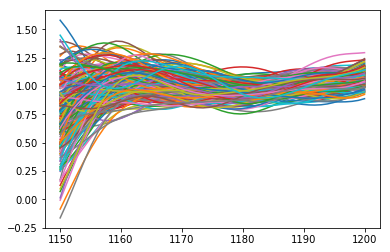

train data error= 1.06639580238


In [7]:
#### 估计训练集的左边
f_left_hat = funcion_regression(Y_train,Y_train)
Y_test_left = Y_train[:,X < lyman_alpha]
m,n = Y_test_left.shape

aver_error = 0           # 计算训练误差
for i in range(m):
    aver_error += distant(Y_test_left[i,:],f_left_hat[i,:])
aver_error /= (m)
for i in range(m):        # 作图
    plt.plot(np.linspace(1150,1200,50),f_left_hat[i,:])
plt.show()
print("train data error=",aver_error)

### 问题（b）

In [8]:
#### 估计测试集的左边
f_left_hat = funcion_regression(Y_train,Y_test)
Y_test_left = Y_test[:,X<lyman_alpha]
h = np.mean(np.sum((f_left_hat-Y_test_left)**2,1))
print("test data error=",h)

test data error= 2.70996957942


### 问题(c)

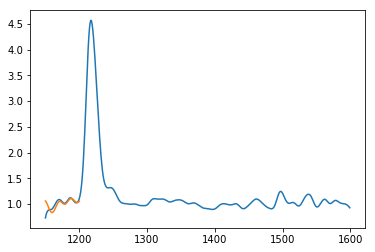

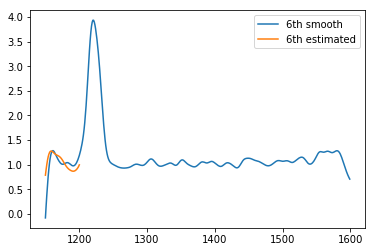

In [9]:
### 绘制test集中第一个的smooth曲线和估计的曲线
plt.figure(2)
plt.plot(X,Y_test[0,:],label="1th smooth")
plt.plot(np.linspace(1150,1200,50),f_left_hat[0,:],label="1th estimated")
### 绘制test集中第六个的smooth曲线和估计的曲线
plt.figure(3)
plt.plot(X,Y_test[5,:],label="6th smooth")
plt.plot(np.linspace(1150,1200,50),f_left_hat[5,:],label="6th estimated")
plt.legend()
plt.show()